In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

img = Image.open(list(uploaded.keys())[0])
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)


Saving Picture1.jpg to Picture1.jpg


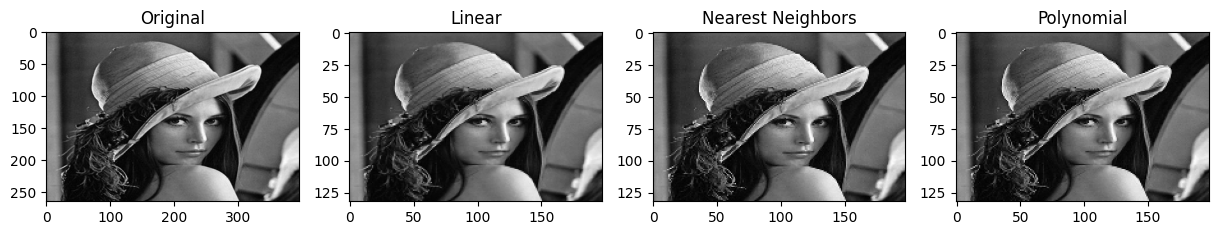

In [3]:
def resize_image(image, scale, method):
    new_size = (int(image.shape[1] * scale), int(image.shape[0] * scale))
    return cv2.resize(image, new_size, interpolation=method)

def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])

    plt.show()
scale = 0.5
linear_resized = resize_image(img, scale, cv2.INTER_LINEAR)
nearest_resized = resize_image(img, scale, cv2.INTER_NEAREST)
poly_resized = resize_image(img, scale, cv2.INTER_LANCZOS4)
titles = ['Original', 'Linear', 'Nearest Neighbors', 'Polynomial']
images = [img, linear_resized, nearest_resized, poly_resized]

display_images(images, titles)



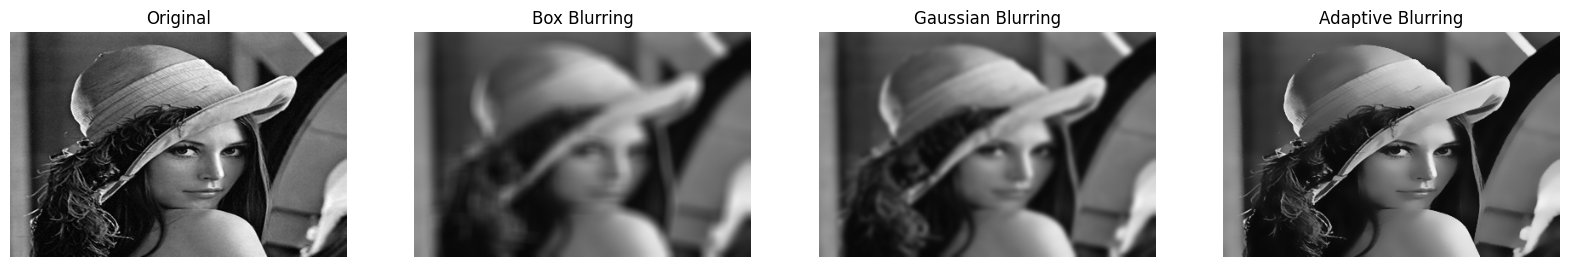

In [4]:
def box_blur(image, ksize):
    return cv2.blur(image, (ksize, ksize))

def gaussian_blur(image, ksize):
    return cv2.GaussianBlur(image, (ksize, ksize), 0)

def adaptive_blur(image, ksize):
    return cv2.bilateralFilter(image, ksize, 75, 75)

def display_images(images, titles):
    plt.figure(figsize=(20, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

ksize = 15
box_blurred = box_blur(img, ksize)
gaussian_blurred = gaussian_blur(img, ksize)
adaptive_blurred = adaptive_blur(img, ksize)
titles = ['Original', 'Box Blurring', 'Gaussian Blurring', 'Adaptive Blurring']
images = [img, box_blurred, gaussian_blurred, adaptive_blurred]
display_images(images, titles)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Naive Bayes Results:
Accuracy: 0.5558
Precision: 0.6917258486386416
Recall: 0.5558
F1 Score: 0.5170420327932064
Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]

Random Forest Results:
Accuracy: 0.9704
Precision: 0.9703956228285179
Recall: 0.9704
F1 Score: 0.9703722598097009
Confusion Matrix:
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5   

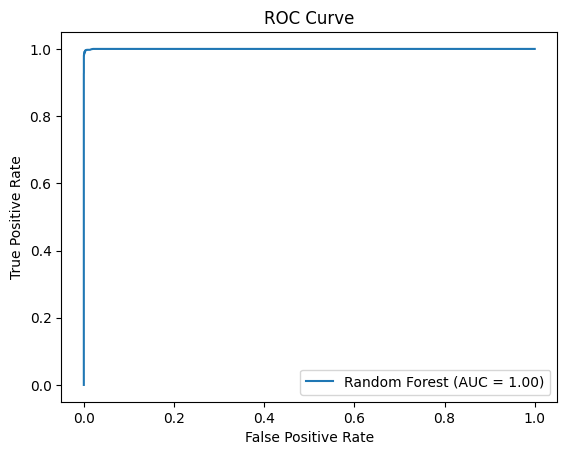

In [8]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_predictions, average='weighted')
nb_cm = confusion_matrix(y_test, nb_predictions)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_probs = rf_model.predict_proba(x_test)
rf_roc_auc = roc_auc_score(y_test, rf_probs, multi_class='ovr')
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs[:, 1], pos_label=1)

print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"Confusion Matrix:\n{nb_cm}")

print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_cm}")
print(f"AUC: {rf_roc_auc}")

plt.figure()
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

